# NLP Application with ML

## Classification of Tweets Data

![](2022-11-23-07-23-04.png)

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
# pip install --upgrade matplotlib 

In [2]:
# pip install seaborn

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
# plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.max_columns', 50)

In [4]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


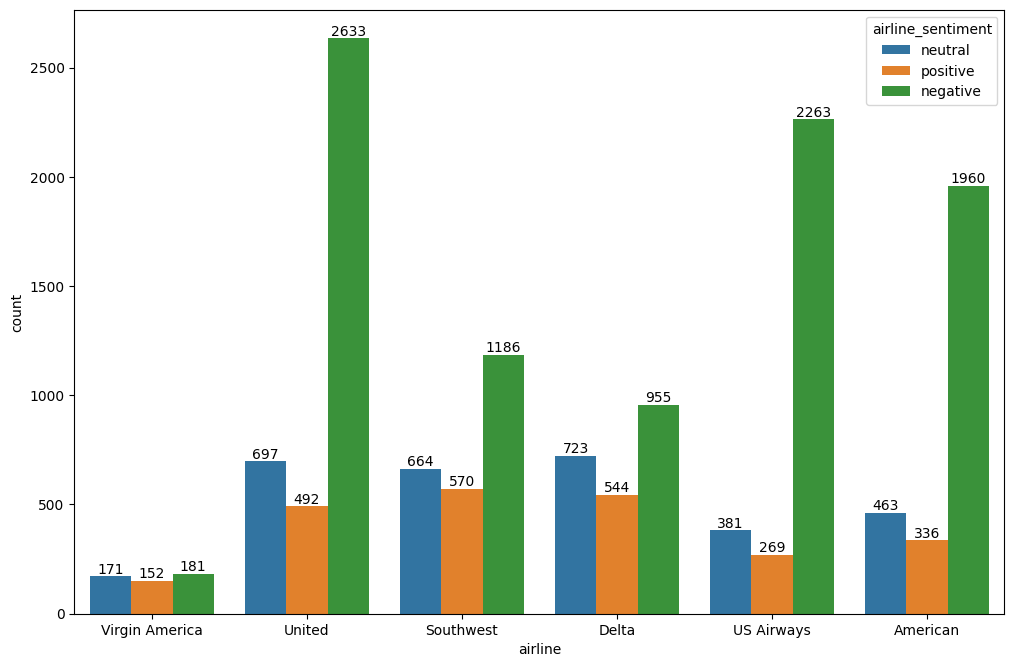

In [5]:
plt.figure(figsize = (12,8) , dpi = 100)
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")

for p in ax.containers:
    ax.bar_label(p)

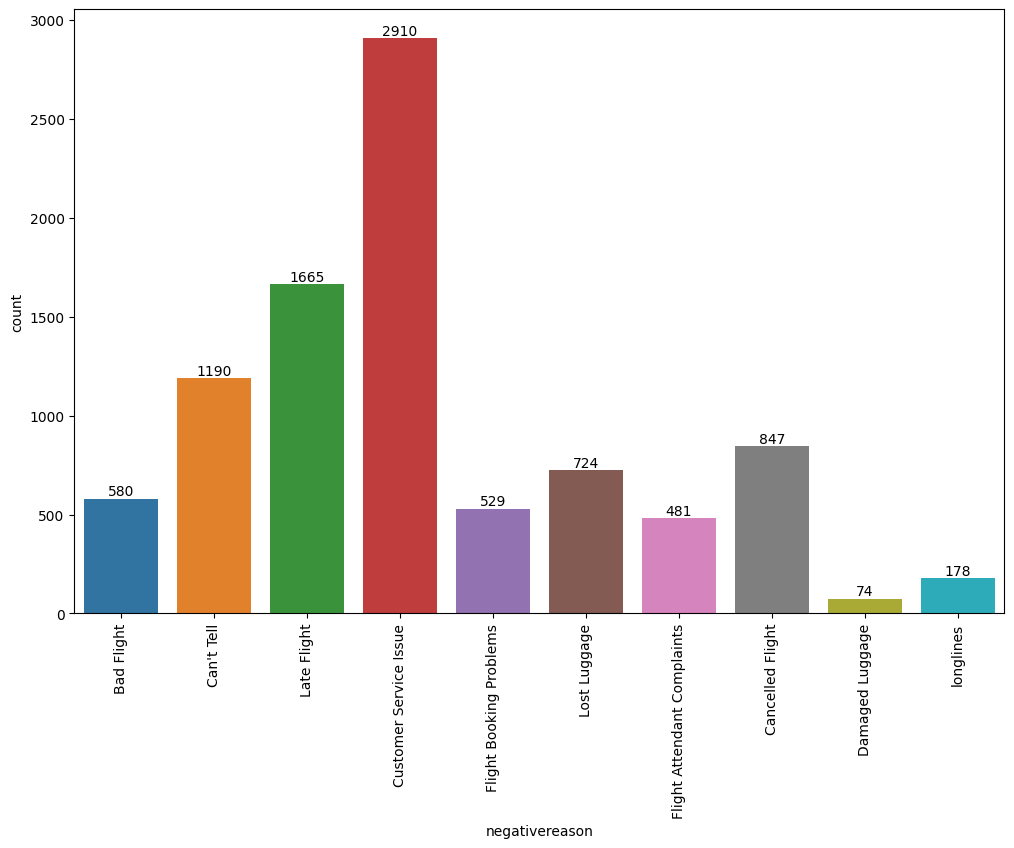

In [6]:
plt.figure(figsize = (12,8) , dpi = 100)
ax = sns.countplot(data = df, x = "negativereason")

ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90);

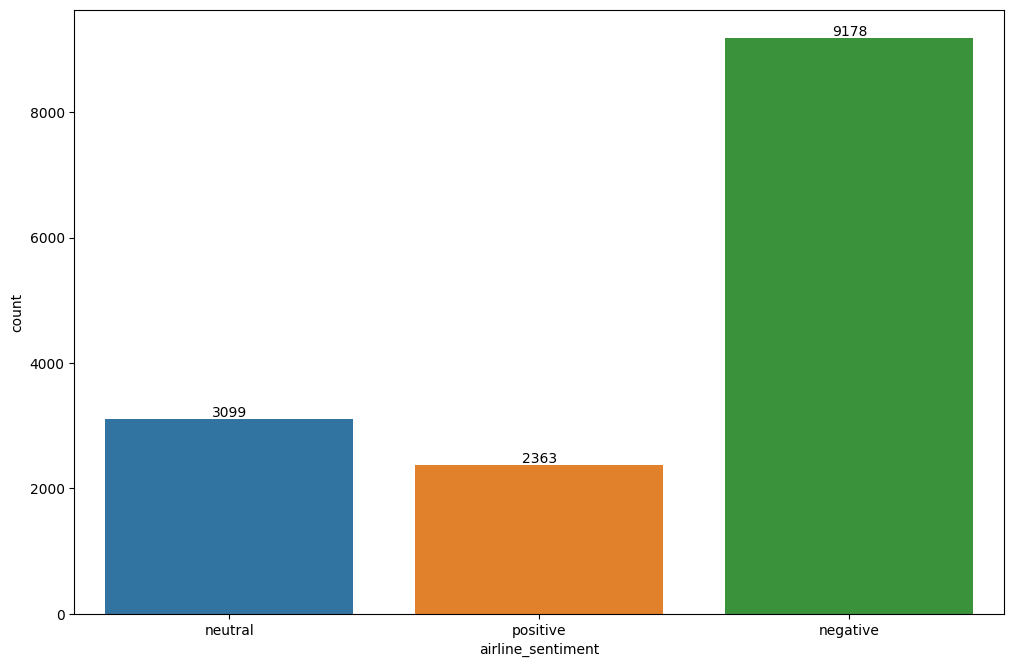

In [7]:
plt.figure(figsize = (12,8) , dpi = 100)
ax = sns.countplot(data = df, x = "airline_sentiment")

ax.bar_label(ax.containers[0]);

In [8]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

![](2022-11-23-07-32-40.png)

## Data Cleaning

### DF Copy

In [9]:
df2 = df.copy()

In [10]:
df2.text.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

### Cleaning Time

In [11]:
import re

In [12]:
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()          # Works like a replace.
s                                             # .strip() is a classic method. Deleting spaces.

'#lateflight @airlines'

In [13]:
s = re.sub("#\S+", "", s)                    # Delete the word which is start with #.
s

' @airlines'

In [14]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [15]:
#nltk.download('stopwords')

In [16]:
#nltk.download('wordnet')

In [17]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

for i in ["not", "no"]:       # 'not' and 'no' are important at sentiment analysis.
    stop_words.remove(i)

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

In [19]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")    # We want words such as don't , can't etc.
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [20]:
cleaning_text = df["text"].apply(cleaning)       # We use the cleaning function to whole 'text' column.
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

### Features and Label

In [21]:
df = df[["airline_sentiment", "text"]]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Train | Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df['text']
y = df['airline_sentiment']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , stratify = y , random_state = 53)

## Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer(preprocessor = cleaning , min_df = 3)  # preprocessor is important parameter. We use the cleaning function for preprocessing.
                                                                    # min_df = 3 means ignore it even if less than 3 in a corpus.
                                                                    # We could have used also ngram_range = (1,2)
                                                                    # We could also use max_features parameters too.

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [27]:
X_train_count # Compressed sparse row format now.

<11712x3133 sparse matrix of type '<class 'numpy.int64'>'
	with 91789 stored elements in Compressed Sparse Row format>

In [28]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,abq,absolute,absolutely,absurd,abt,...,young,youre,youth,youve,yr,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Comparisons - Vectorization

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [31]:
def eval_metric(model, X_train, X_test , y_train , y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Modelling

### Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB , BernoulliNB # BernoulliNB for binary models.

In [33]:
nb = MultinomialNB(alpha = 3)
nb.fit(X_train_count , y_train)

MultinomialNB(alpha=3)

In [34]:
print('NB Model')
eval_metric(nb,X_train_count , X_test_count , y_train , y_test)

NB Model
[[1702   83   50]
 [ 336  236   48]
 [ 162   42  269]]
Test_Set
              precision    recall  f1-score   support

    negative       0.77      0.93      0.84      1835
     neutral       0.65      0.38      0.48       620
    positive       0.73      0.57      0.64       473

    accuracy                           0.75      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.74      0.75      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      7343
     neutral       0.75      0.50      0.60      2479
    positive       0.81      0.69      0.74      1890

    accuracy                           0.81     11712
   macro avg       0.79      0.71      0.74     11712
weighted avg       0.80      0.81      0.79     11712



In [35]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average = None, labels = ["negative"]),
            'recall-neg': make_scorer(recall_score, average = None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average = None, labels = ["negative"])}

# model = MultinomialNB(alpha = 3)
scores = cross_validate(nb, X_train_count, y_train, scoring = scoring, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.758366
test_precision-neg    0.779807
test_recall-neg       0.923192
test_f1-neg           0.845425
dtype: float64

In [36]:
# !pip install yellowbrick

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


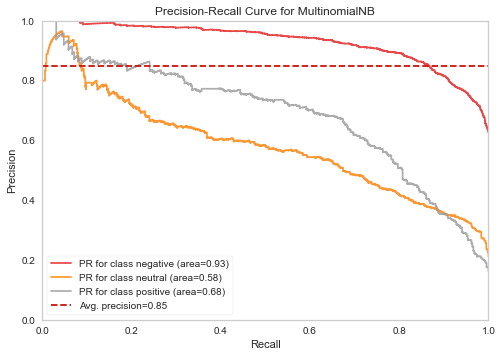

In [37]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    nb,
    classes = nb.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [38]:
y_pred = nb.predict(X_test_count)

nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

In [39]:
nb_AP_neg

0.9299645186967378

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.02, max_iter=1000) # class_weight = 'balanced' optional.
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [41]:
print("LOG MODEL")
eval_metric(log, X_train_count, X_test_count , y_train , y_test)

LOG MODEL
[[1767   43   25]
 [ 373  202   45]
 [ 202   42  229]]
Test_Set
              precision    recall  f1-score   support

    negative       0.75      0.96      0.85      1835
     neutral       0.70      0.33      0.45       620
    positive       0.77      0.48      0.59       473

    accuracy                           0.75      2928
   macro avg       0.74      0.59      0.63      2928
weighted avg       0.75      0.75      0.72      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.77      0.38      0.51      2479
    positive       0.80      0.52      0.63      1890

    accuracy                           0.77     11712
   macro avg       0.78      0.62      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [42]:
# model = LogisticRegression(C = 0.02, max_iter = 1000)

scores = cross_validate(log, X_train_count, y_train, scoring = scoring, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.745901
test_precision-neg    0.746036
test_recall-neg       0.963912
test_f1-neg           0.841055
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


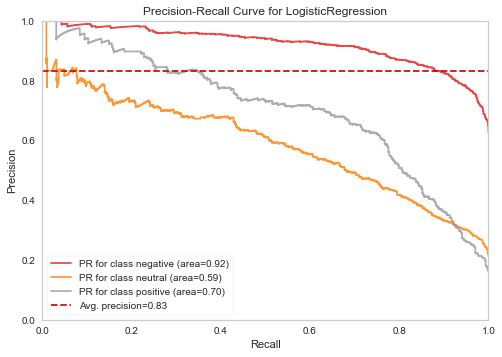

In [43]:
viz = PrecisionRecallCurve(
    log,
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [44]:
y_pred = log.predict(X_test_count)

log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [45]:
log_AP_neg

0.9211391445937626

In [46]:
log = LogisticRegression(C = 0.02, max_iter = 1000, class_weight = 'balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [47]:
print("LOG MODEL BALANCED")
eval_metric(log, X_train_count, X_test_count , y_train , y_test)

LOG MODEL BALANCED
[[1325  404  106]
 [  88  462   70]
 [  44  104  325]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.72      0.80      1835
     neutral       0.48      0.75      0.58       620
    positive       0.65      0.69      0.67       473

    accuracy                           0.72      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.78      0.72      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.73      0.82      7343
     neutral       0.52      0.79      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.76      0.72     11712
weighted avg       0.80      0.75      0.76     11712



### SVM

In [48]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [49]:
print("SVC MODEL")
eval_metric(svc, X_train_count, X_test_count , y_train , y_test)

SVC MODEL
[[1731   69   35]
 [ 294  274   52]
 [ 142   58  273]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1835
     neutral       0.68      0.44      0.54       620
    positive       0.76      0.58      0.66       473

    accuracy                           0.78      2928
   macro avg       0.75      0.65      0.69      2928
weighted avg       0.77      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.81      0.65      0.72      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.72      0.75     11712
weighted avg       0.82      0.82      0.81     11712



In [50]:
# model = LinearSVC(C = 0.01)

scores = cross_validate(svc, X_train_count, y_train, scoring = scoring, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.779968
test_precision-neg    0.801073
test_recall-neg       0.936674
test_f1-neg           0.863557
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


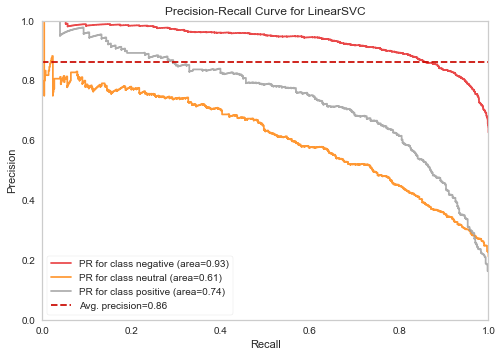

In [51]:
viz = PrecisionRecallCurve(
    svc,
    classes = svc.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [52]:
y_pred = svc.predict(X_test_count)

svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

In [53]:
svc_AP_neg

0.9321302802765503

### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [55]:
print("KNN MODEL")
eval_metric(knn, X_train_count, X_test_count , y_train , y_test)

KNN MODEL
[[892 873  70]
 [ 93 469  58]
 [ 57 175 241]]
Test_Set
              precision    recall  f1-score   support

    negative       0.86      0.49      0.62      1835
     neutral       0.31      0.76      0.44       620
    positive       0.65      0.51      0.57       473

    accuracy                           0.55      2928
   macro avg       0.61      0.58      0.54      2928
weighted avg       0.71      0.55      0.57      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.91      0.61      0.73      7343
     neutral       0.39      0.83      0.53      2479
    positive       0.69      0.57      0.63      1890

    accuracy                           0.65     11712
   macro avg       0.67      0.67      0.63     11712
weighted avg       0.77      0.65      0.67     11712



In [56]:
# model = KNeighborsClassifier(n_neighbors = 7)

scores = cross_validate(knn, X_train_count, y_train, scoring = scoring, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.535775
test_precision-neg    0.862646
test_recall-neg       0.463570
test_f1-neg           0.602411
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


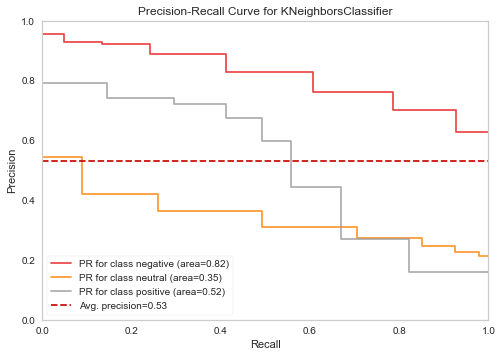

In [57]:
viz = PrecisionRecallCurve(
    knn,
    classes = knn.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [58]:
y_pred = knn.predict(X_test_count)

knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = viz.score_["negative"]

In [59]:
knn_AP_neg

0.8187158155238008

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, max_depth = 40, random_state = 53 , n_jobs = -1) # class_weight = "balanced" optional
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=53)

In [61]:
print("RF MODEL")
eval_metric(rf, X_train_count, X_test_count , y_train , y_test)

RF MODEL
[[1807   15   13]
 [ 513   72   35]
 [ 248    8  217]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.12      0.20       620
    positive       0.82      0.46      0.59       473

    accuracy                           0.72      2928
   macro avg       0.76      0.52      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.22      0.35      2479
    positive       0.92      0.64      0.76      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.62      0.65     11712
weighted avg       0.82      0.77      0.73     11712



In [62]:
# rf = RandomForestClassifier(100, max_depth = 40, random_state = 53, n_jobs = -1)

scores = cross_validate(rf, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.710211
test_precision-neg    0.699143
test_recall-neg       0.980253
test_f1-neg           0.816153
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


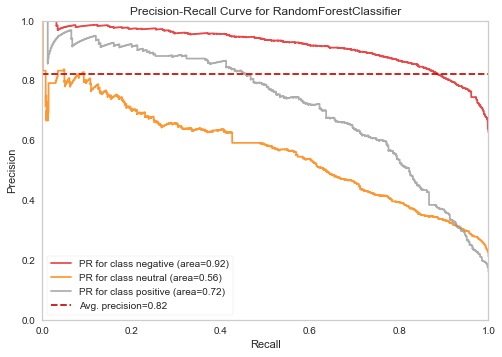

In [63]:
viz = PrecisionRecallCurve(
    rf,
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [64]:
y_pred = rf.predict(X_test_count)

rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

In [65]:
rf_AP_neg

0.9173450639847469

In [66]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight = "balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [67]:
print("RF MODEL BALANCED")
eval_metric(rf, X_train_count, X_test_count , y_train , y_test)

RF MODEL BALANCED
[[1466  292   77]
 [ 160  392   68]
 [  77   91  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.86      0.80      0.83      1835
     neutral       0.51      0.63      0.56       620
    positive       0.68      0.64      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.69      0.68      2928
weighted avg       0.76      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.98      0.85      0.91      7343
     neutral       0.64      0.92      0.75      2479
    positive       0.88      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.84     11712
weighted avg       0.89      0.86      0.87     11712



### Ada Boost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 500, random_state = 53)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=53)

In [69]:
print("Ada MODEL")
eval_metric(ada, X_train_count, X_test_count , y_train , y_test)

Ada MODEL
[[1563  214   58]
 [ 206  348   66]
 [  84   90  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      1835
     neutral       0.53      0.56      0.55       620
    positive       0.71      0.63      0.67       473

    accuracy                           0.75      2928
   macro avg       0.69      0.68      0.69      2928
weighted avg       0.76      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      7343
     neutral       0.62      0.64      0.63      2479
    positive       0.79      0.72      0.75      1890

    accuracy                           0.80     11712
   macro avg       0.76      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [70]:
# model = AdaBoostClassifier(n_estimators= 500, random_state = 53)

scores = cross_validate(ada, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.757085
test_precision-neg    0.842477
test_recall-neg       0.849105
test_f1-neg           0.845692
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


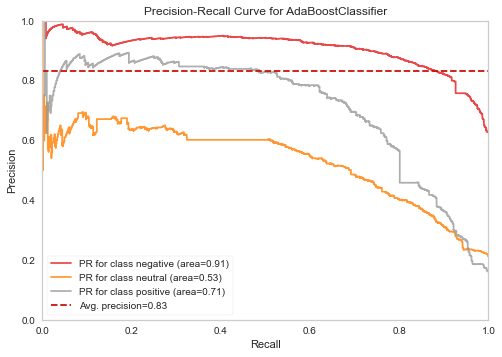

In [71]:
viz = PrecisionRecallCurve(
    ada,
    classes=ada.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [72]:
y_pred = ada.predict(X_test_count)

ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = viz.score_["negative"]

In [73]:
ada_AP_neg

0.9083853847130225

### Gradient Boost

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
# from sklearn.model_selection import GridSearchCV

# gb = GradientBoostingClassifier()

# gb_model = GridSearchCV(gb , param_grid = {'n_estimators' : [10,30,50,80,100,150,250,500]} , scoring = make_scorer(f1_score, average = None, labels = ["negative"]) , cv = 10 , n_jobs = -1).fit(X_train_count , y_train)

In [76]:
# gb_model.best_params_

In [77]:
# gb_model.best_score_

In [78]:
gb = GradientBoostingClassifier(n_estimators = 500).fit(X_train_count , y_train)

In [79]:
print("GB MODEL")
eval_metric(gb, X_train_count, X_test_count , y_train , y_test)

GB MODEL
[[1737   51   47]
 [ 371  192   57]
 [ 149   34  290]]
Test_Set
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      1835
     neutral       0.69      0.31      0.43       620
    positive       0.74      0.61      0.67       473

    accuracy                           0.76      2928
   macro avg       0.73      0.62      0.65      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.88      0.47      0.61      2479
    positive       0.84      0.74      0.79      1890

    accuracy                           0.83     11712
   macro avg       0.84      0.73      0.76     11712
weighted avg       0.83      0.83      0.81     11712



In [80]:
# model = GradientBoostingClassifier(n_estimators = 100, random_state = 53)

scores = cross_validate(gb, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.761526
test_precision-neg    0.777275
test_recall-neg       0.935176
test_f1-neg           0.848850
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


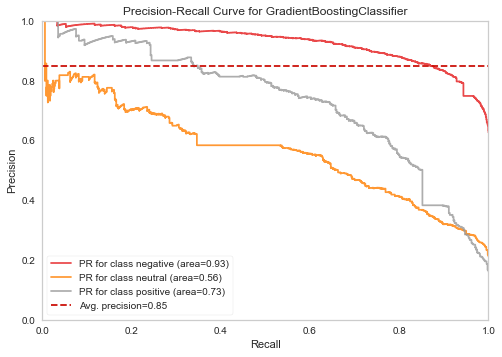

In [81]:
viz = PrecisionRecallCurve(
    gb,
    classes = gb.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [82]:
y_pred = gb.predict(X_test_count)

ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
gb_AP_neg = viz.score_["negative"]

In [83]:
gb_AP_neg

0.9263271595976843

### XG Boost

In [84]:
from xgboost import XGBClassifier

In [85]:
y_train_xgb = y_train.map({'negative' : 0 , 'neutral' : 1 , 'positive' : 2}) # For xgb
y_test_xgb = y_test.map({'negative' : 0 , 'neutral' : 1 , 'positive' : 2})

In [86]:
# # from sklearn.model_selection import GridSearchCV

# xgb = XGBClassifier()

# xgb_model = GridSearchCV(xgb , param_grid = {'n_estimators' : [10,30,50,80,100,150,250]} , scoring = make_scorer(recall_score, average = None, labels = [0]) , cv = 10 , n_jobs = -1).fit(X_train_count , y_train_xgb)

In [87]:
# xgb_model.best_params_

In [88]:
# xgb_model.best_score_

In [89]:
xgb = XGBClassifier(n_estimators = 500).fit(X_train_count , y_train_xgb)

In [90]:
print("XGB MODEL")
eval_metric(xgb, X_train_count, X_test_count , y_train_xgb , y_test_xgb)

XGB MODEL
[[1661  128   46]
 [ 222  344   54]
 [ 104   71  298]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1835
           1       0.63      0.55      0.59       620
           2       0.75      0.63      0.68       473

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.78      2928

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7343
           1       0.85      0.84      0.85      2479
           2       0.93      0.86      0.89      1890

    accuracy                           0.92     11712
   macro avg       0.91      0.89      0.90     11712
weighted avg       0.92      0.92      0.92     11712



In [91]:
scoring_xgb = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average = None, labels = [0]),
            'recall-neg': make_scorer(recall_score, average = None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average = None, labels = [0])}

In [92]:
# model = XGBClassifier(n_estimators = 500).fit(X_train_count , y_train_xgb)

scores = cross_validate(xgb, X_train_count, y_train_xgb, scoring = scoring_xgb, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.794825
test_precision-neg    0.844907
test_recall-neg       0.900720
test_f1-neg           0.871820
dtype: float64

In [94]:
xgb.classes_

array([0, 1, 2], dtype=int64)

In [95]:
viz = PrecisionRecallCurve(
    xgb,
    classes = xgb.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_count,y_train_xgb)
viz.score(X_test_count, y_test_xgb)
viz.show(); # I'll find why didin't work.

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [97]:
y_pred = xgb.predict(X_test_count)

xgb_count_rec_neg = recall_score(y_test_xgb, y_pred, labels = [0], average = None)
xgb_count_f1_neg = f1_score(y_test_xgb, y_pred, labels = [0], average = None)
# xgb_AP_neg = viz.score_['negative']

In [99]:
# xgb_AP_neg

### LG Boost

In [100]:
from lightgbm import LGBMClassifier

In [101]:
X_train_lgb = X_train_count.astype('float32')
X_test_lgb = X_test_count.astype('float32')   
y_train = y_train_xgb.astype('float32')
y_test = y_test_xgb.astype('float32')

In [102]:
lgb = LGBMClassifier(n_estimators = 500).fit(X_train_lgb , y_train)

In [103]:
print("LGB MODEL")
eval_metric(lgb, X_train_lgb, X_test_lgb , y_train , y_test)

LGB MODEL
[[1613  168   54]
 [ 207  354   59]
 [ 101   76  296]]
Test_Set
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1835
         1.0       0.59      0.57      0.58       620
         2.0       0.72      0.63      0.67       473

    accuracy                           0.77      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.77      0.77      0.77      2928

Train_Set
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      7343
         1.0       0.81      0.80      0.80      2479
         2.0       0.92      0.87      0.89      1890

    accuracy                           0.91     11712
   macro avg       0.89      0.87      0.88     11712
weighted avg       0.91      0.91      0.91     11712



In [104]:
# model = LGBMClassifier(n_estimators = 500).fit(X_train_lgb , y_train)

scores = cross_validate(lgb, X_train_lgb, y_train, scoring = scoring_xgb, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.774845
test_precision-neg    0.842062
test_recall-neg       0.877706
test_f1-neg           0.859405
dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


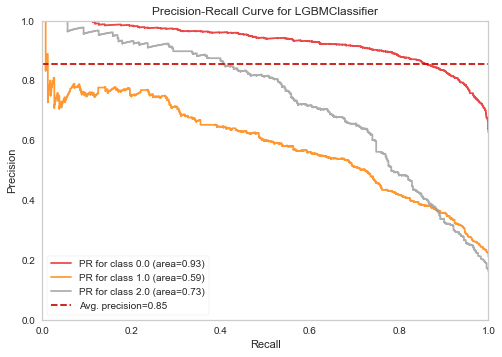

In [105]:
viz = PrecisionRecallCurve(
    lgb,
    classes = lgb.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_lgb,y_train)
viz.score(X_test_lgb, y_test)
viz.show();

In [106]:
y_pred = lgb.predict(X_test_lgb)

lgb_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
lgb_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
lgb_AP_neg = viz.score_[0]

In [107]:
lgb_AP_neg

0.9279275007518684

In [ ]:
# Done for now.